# Gráficas de cajas de los parametrós estadisticos de las realizaciones del viento

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Importando datos

In [4]:
wndStats = pd.read_excel(r'..\data\stats_wind_realizations.xlsx')

In [5]:
wndStats.head()

,Uw [m/s],mu(Vx) [m/s],sigma(Vx) [m/s]
0,7.0,7.027756,1.087782
1,7.0,6.995778,1.358742
2,7.0,7.015883,1.673092
3,7.0,6.985760,1.505596
4,7.0,7.001068,1.679398


## 1. Gráfico de puntos del promedio de las realizaciones de velocidad de viento¶

Se emplea un grafico de puntos ya que los valores promedio de las realizaciones por cada velocidad de viento son muy cercanos. Por tal motivo, no es conveniente un diagrama de cajas y bigotes.

### 1.1. Variables de control de gráfico

In [6]:
ps_w, ps_h = 15, 6
line_w = 0.8
axFont = 20
num_axFont = 16

grid_dash = (8, 4)
grid_lw = 0.5

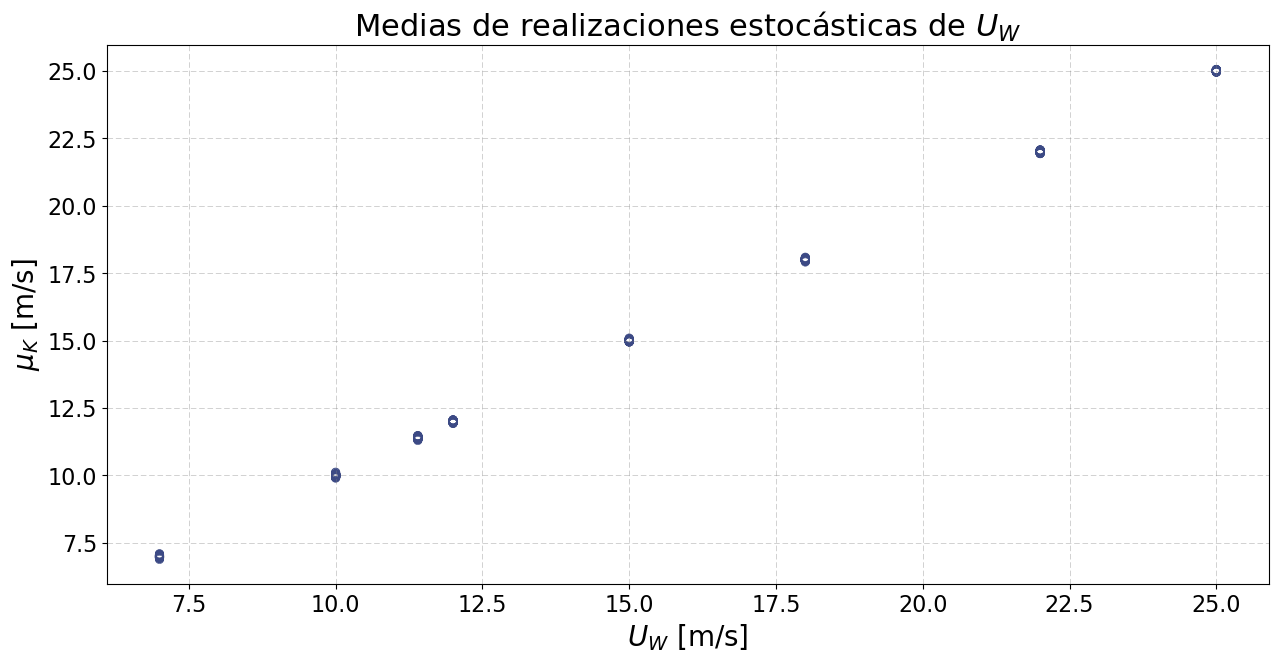

In [13]:
# Creando gráfico
fig, ax = plt.subplots(figsize = (ps_w, ps_h))

ax.scatter(wndStats['Uw [m/s]'], wndStats['mu(Vx) [m/s]'],
           edgecolor='#3C4A85', facecolor='none', linewidth=line_w)

ax.set_title('Medias de realizaciones estocásticas de $U_W$', fontsize = axFont+2)
ax.set_ylabel('$\mu_K$ [m/s]', fontsize = axFont)
ax.set_xlabel(r'$U_W$ [m/s]', fontsize = axFont)

ax.tick_params(axis = 'both', labelsize = num_axFont)

# Agregar grid con líneas discontinuas
ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)

## 2. Gráfico de cajas de la desviación estandard de las realizaciones de velocidad de viento

### 2.1. Obteniendo valores unicos en la columna Uw

In [8]:
uw_labels = wndStats['Uw [m/s]'].unique()

### 2.2. Iterando sobre los valores unicos y agregando los valores de desviacion estandar de las realizaciones estocasticas por cada velocidad de viento

In [9]:
sigma_vals = []

for ulab in uw_labels:
    tmp_vals = wndStats.loc[wndStats['Uw [m/s]'] == ulab]['sigma(Vx) [m/s]'] #Filtrando valores de sigma en base a Uw
    sigma_vals.append(tmp_vals)

### 2.3. Creando boxplot

#### a) Variables de control de gráfico

In [10]:
ps_w, ps_h = 15, 7
line_w = 0.5
axFont = 20       #tamaño para el texto del eje
num_axFont = 16   #Tamaño de los números del eje

grid_dash = (8,4)
grid_lw = 0.5

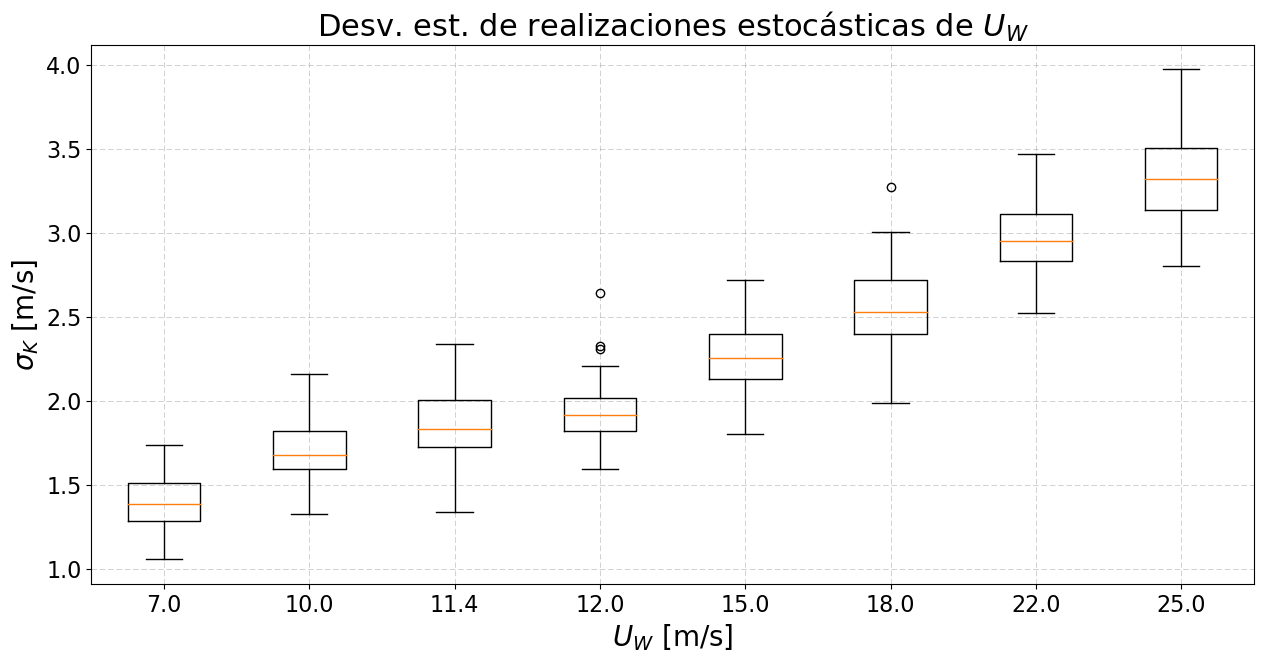

In [14]:
# Creando boxplot
fig = plt.figure(figsize = (ps_w, ps_h))
ax = fig.add_subplot(111)

ax.boxplot(sigma_vals, positions = range(1, len(uw_labels)+1))
ax.set_xticklabels(uw_labels)

ax.set_xlabel("$U_W$ [m/s]", fontsize = axFont)
ax.set_ylabel("$\sigma_K$ [m/s]", fontsize = axFont)
ax.set_title("Desv. est. de realizaciones estocásticas de $U_W$", fontsize = axFont + 2)

ax.tick_params(axis='both', labelsize = num_axFont)

ax.grid(color = 'gray', linestyle = '--', linewidth = grid_lw, alpha=0.5, dashes = grid_dash)